In [2]:
import pandas as pd

cust_df = pd.read_csv("customers.csv")
cust_df.shape

(5000, 3)

In [3]:
cust_df.head()

,customer_id,age_cat,freq_cat
0,1,age20~34,freq2
1,2,age35~49,freq0
2,3,age35~49,freq0
3,4,age~19,freq0
4,5,age35~49,freq0


In [4]:
cust_df.dtypes

customer_id     int64
age_cat        object
freq_cat       object
dtype: object

<Axes: >

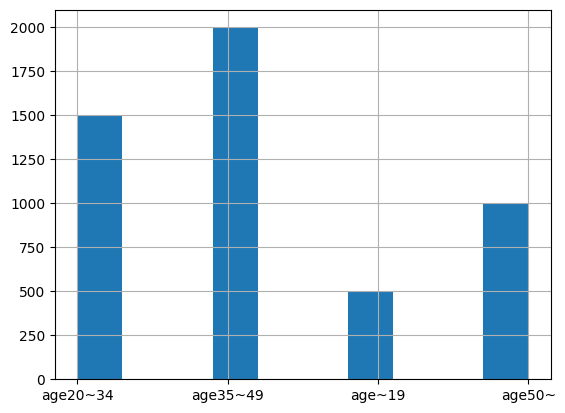

In [5]:
cust_df["age_cat"].hist()

<Axes: >

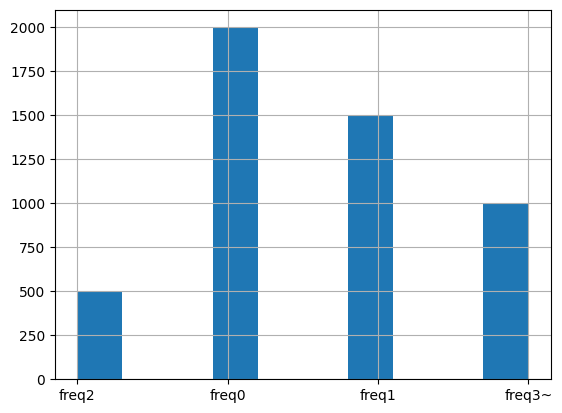

In [6]:
cust_df["freq_cat"].hist()

In [7]:
cust_pivot_df = pd.pivot_table(
    data=cust_df,
    values="customer_id",
    columns="freq_cat",
    index="age_cat",
    aggfunc="count",
)
cust_pivot_df = cust_pivot_df.reindex(["age~19", "age20~34", "age35~49", "age50~"])
cust_pivot_df

freq_cat,freq0,freq1,freq2,freq3~
age_cat,,,,
age~19,200,150,50,100
age20~34,600,450,150,300
age35~49,800,600,200,400
age50~,400,300,100,200


<Axes: xlabel='freq_cat', ylabel='age_cat'>

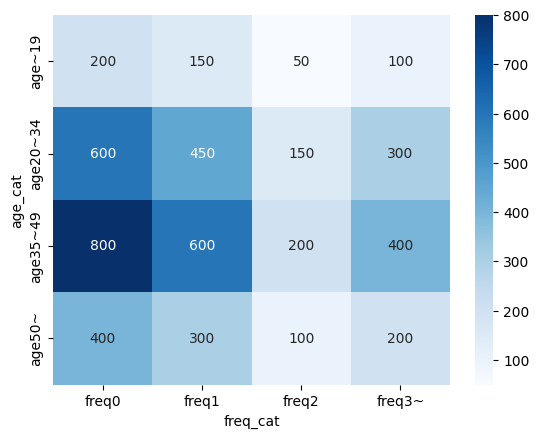

In [8]:
import seaborn as sns

sns.heatmap(cust_pivot_df, annot=True, fmt="d", cmap="Blues")

In [9]:
prob_df = pd.read_csv("visit_probability.csv")
prob_df.shape

(16, 6)

In [10]:
prob_df

,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3
0,age~19,freq0,1,0.07,0.12,0.29
1,age~19,freq1,2,0.21,0.30,0.58
2,age~19,freq2,3,0.28,0.39,0.74
3,age~19,freq3~,4,0.35,0.45,0.77
4,age20~34,freq0,5,0.11,0.17,0.37
5,age20~34,freq1,6,0.32,0.43,0.72
6,age20~34,freq2,7,0.42,0.55,0.93
7,age20~34,freq3~,8,0.52,0.63,0.94
8,age35~49,freq0,9,0.08,0.14,0.33
9,age35~49,freq1,10,0.25,0.35,0.67


In [ ]:
import matplotlib.pyplot as plt

ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(20, 3))
for i, ptn in enumerate(["prob_dm1", "prob_dm2", "prob_dm3"]):
    prob_pivot_df = pd.pivot_table(
        data=prob_df, values=ptn, columns="freq_cat", index="age_cat"
    )
    prob_pivot_df = prob_pivot_df.reindex(["age~19", "age20~34", "age35~49", "age50~"])
    sns.heatmap(
        prob_pivot_df, vmin=0, vmax=1, annot=True, fmt=".0%", cmap="Blues", ax=ax[i]
    )
    ax[i].set_title(f"Visit Probability of {ptn}")
plt.show()